In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.arange(0.5,1000,1,dtype = np.float) #frequency in day^-1

In [2]:
def f_Lz(w,w0,Q):
    ff = (1/(1 + ((w-w0)/Q)**2))*1000
    return(ff)


def S(w,w_break,p1,p2,Q,model):
    ff = np.zeros(w.size,dtype = np.float)
    if model == "unbroken":
        ff = w**p1
    elif model == "broken":
        idx1 = np.where(w<=w_break)
        idx2 = np.where(w>w_break)
        ff[idx1] = w[idx1]**p1
        Amp = 10**((p1-p2)*np.log10(w_break))
        ff[idx2] = Amp*w[idx2]**p2
    elif model == "smooth_break":
        delta_sm = 1
        ff = (w/w_break)**p1*((1/2)*(1 + (w/w_break)**(1/delta_sm)))**((p2-p1)*delta_sm)
    elif model == "lorentzian":
        ff = f_Lz(w,w_break,Q)
    return(ff)

In [3]:
def LC_cal(w,S,fw):
    fw = np.sqrt((1/2)*S)*fw
    rev_arr1 = np.conjugate(fw[::-1])
    fw1 = np.concatenate((rev_arr1,fw)) #****

    rev_arr2 = -w[::-1]
    w1 = np.concatenate((rev_arr2,w)) #****

    t = np.arange(0,8*np.pi,0.01) # time in days
    LC = np.zeros(t.size, dtype = np.float)

    for i in range(t.size):
        LC[i] = np.sum(np.exp(1j*w1*t[i])*fw1)
    
    return([t,LC])

In [4]:
#For lightcurves from different set of random numbers run this every time
fw = np.zeros((w.size),dtype = np.complex)
for i in range(w.size):
    X = np.random.normal(0,1e-1,2)
    fw[i] = X[0] + 1j*X[1]

In [6]:
S00 = S(w,0,-1.0,0,0,"unbroken")
S01 = S(w,0,-2.0,0,0,"unbroken")
S02 = S(w,0,-3.0,0,0,"unbroken")

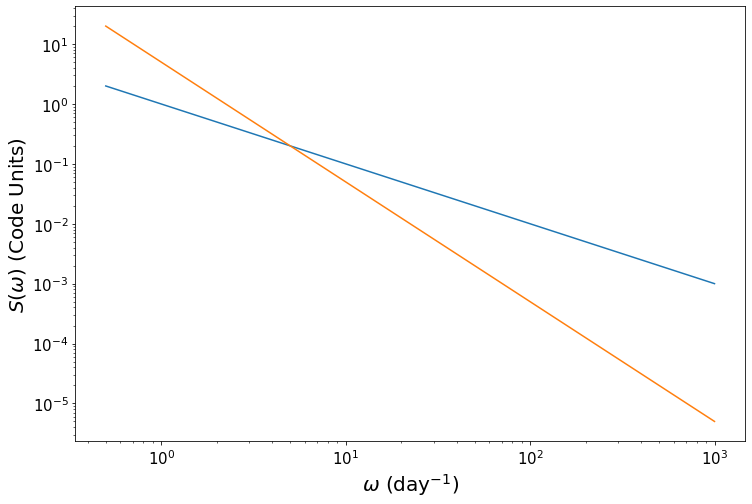

In [7]:
plt.figure(figsize=(12,8))
plt.axes(xscale ='log',yscale ='log')
plt.xticks(size = 0.8,fontsize = 15)
#plt.xticks(np.array([wbreak]),(''))
plt.yticks(size = 0.8,fontsize = 15)
#plt.ylim(1e-6,5e0)
plt.plot(w,S00)
plt.plot(w,S01*5)#/max(S01)*max(S0))
#plt.plot(w,S02/max(S2)*max(S0))
#plt.plot([wbreak,wbreak],[1e-6,5e0],linestyle = 'dashed',color = 'black')
plt.xlabel(r'$\omega$ (day$^{-1}$)', fontsize = 20)
plt.ylabel(r'$S(\omega)$ (Code Units)', fontsize = 20)
plt.show()

In [8]:
LC0 = LC_cal(w,S00,fw)
LC1 = LC_cal(w,S01*5,fw)
LC2 = LC_cal(w,S02*5,fw)

t0 = LC0[0]
flux0 = np.real(LC0[1]) 

t1 = LC1[0]
flux1 = np.real(LC1[1])

t2 = LC2[0]
flux2 = np.real(LC2[1])

/work/tathagata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


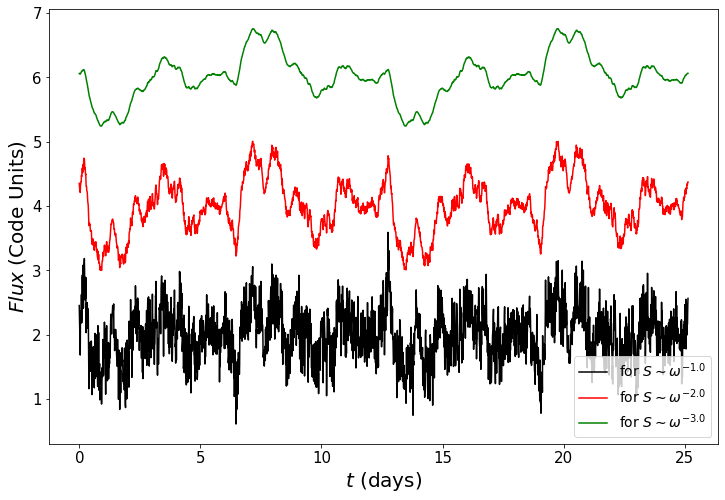

In [9]:
plt.figure(figsize=(12,8))
plt.xticks(size = 0.8,fontsize = 15)
plt.yticks(size = 0.8,fontsize = 15)
plt.xlabel(r'$t$ (days)', fontsize = 20)
#plt.ylim(-1.5,10.5)
plt.ylabel(r'$Flux$ (Code Units)', fontsize = 20)
plt.plot(t0,flux0+2.0,color = 'black', label = r'for $S \sim \omega^{-1.0} $')
plt.plot(t1,flux1+4.0,color = 'red', label = r'for $ S \sim \omega^{-2.0} $')
plt.plot(t1,flux2+6.0,color = 'green', label = r'for $ S \sim \omega^{-3.0} $')
plt.legend(loc = 'best',fontsize = 14)
#plt.savefig('LC_test_2.png')
plt.show()
#plt.plot(t2,flux2/max(flux2))

In [9]:
wbreak = 8.0
S11 = S(w,wbreak,-0.5,-2.5,0,model = "broken")
S12 = S(w,wbreak,-2.5,-3.5,0,model = "broken")

In [88]:
wpeak = 20
S21 = S(w,wpeak,0,0,1e-5,model = "lorentzian")
#S22 = S(w,wpeak,0,0,1.0,model = "lorentzian")

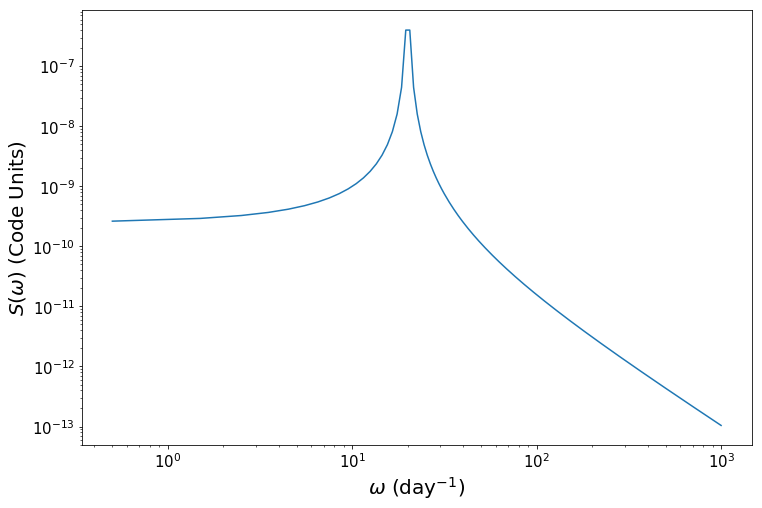

In [89]:

plt.figure(figsize=(12,8))
plt.axes(xscale ='log',yscale ='log')
plt.xticks(size = 0.8,fontsize = 15)
plt.yticks(size = 0.8,fontsize = 15)
#plt.xlim(0,10)
plt.plot(w,S21)
#plt.plot(w,S22)
plt.xlabel(r'$\omega$ (day$^{-1}$)', fontsize = 20)
plt.ylabel(r'$S(\omega)$ (Code Units)', fontsize = 20)
plt.show()

In [92]:
LC21 = LC_cal(w,S21,fw)
t2 = LC21[0]
flux21 = np.real(LC21[1])

#LC22 = LC_cal(w,S22,fw)
#t2 = LC22[0]
#flux22 = np.real(LC22[1])

/home/tathagata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


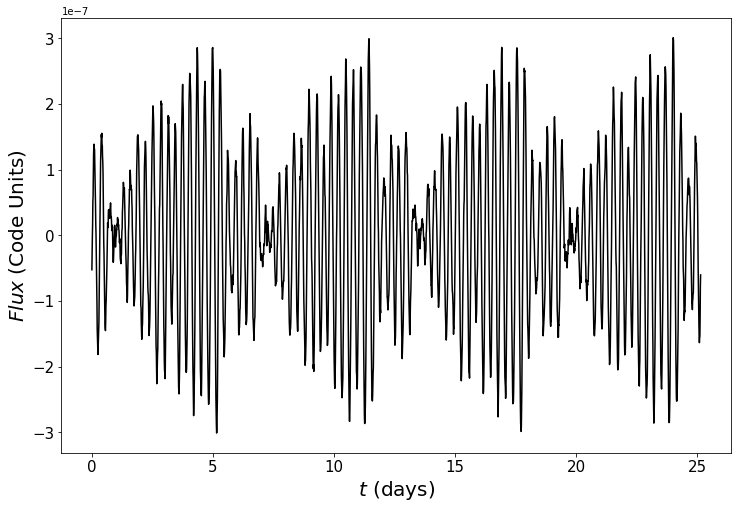

In [93]:

plt.figure(figsize=(12,8))
plt.xticks(size = 0.8,fontsize = 15)
plt.yticks(size = 0.8,fontsize = 15)
plt.xlabel(r'$t$ (days)', fontsize = 20)
#plt.xlim(0,5)
plt.ylabel(r'$Flux$ (Code Units)', fontsize = 20)
plt.plot(t2,flux21,color = 'black', label = r'for $S \sim \omega^{-1.0} $')
#plt.plot(t2,flux22,color = 'red', label = r'for $S \sim \omega^{-1.0} $')